# Laboratorio 5
- Jimena Hernandez
- Mark Albrand

## Parte 1: Preparación de Datos


### 1.1 Carga de Datos

In [82]:
import matplotlib.pyplot as plt

In [83]:
import pandas as pd
data = pd.read_csv('UK_foods.csv', index_col=0)

### 1.2 Exploración básica de los datos (estadísticas descriptivas).

In [84]:
data.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


In [85]:
data.isnull().sum()

England      0
Wales        0
Scotland     0
N.Ireland    0
dtype: int64

In [86]:
data.dtypes

England      int64
Wales        int64
Scotland     int64
N.Ireland    int64
dtype: object

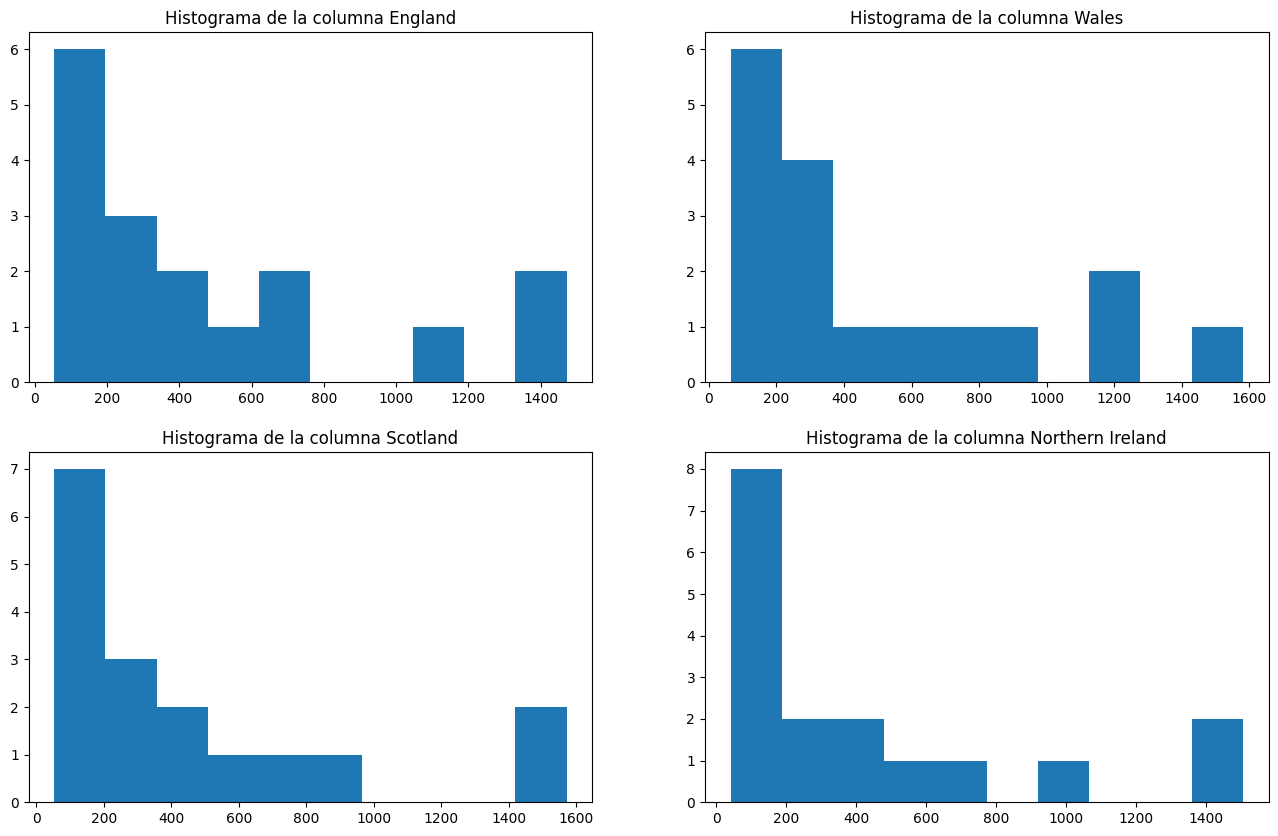

In [87]:
# histograma de la columna 'England'
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.hist(data['England'])
plt.title('Histograma de la columna England')

plt.subplot(2, 2, 2)
plt.hist(data['Wales'])
plt.title('Histograma de la columna Wales')

plt.subplot(2, 2, 3)
plt.hist(data['Scotland'])
plt.title('Histograma de la columna Scotland')

plt.subplot(2, 2, 4)
plt.hist(data['N.Ireland'])
plt.title('Histograma de la columna Northern Ireland')

plt.show()

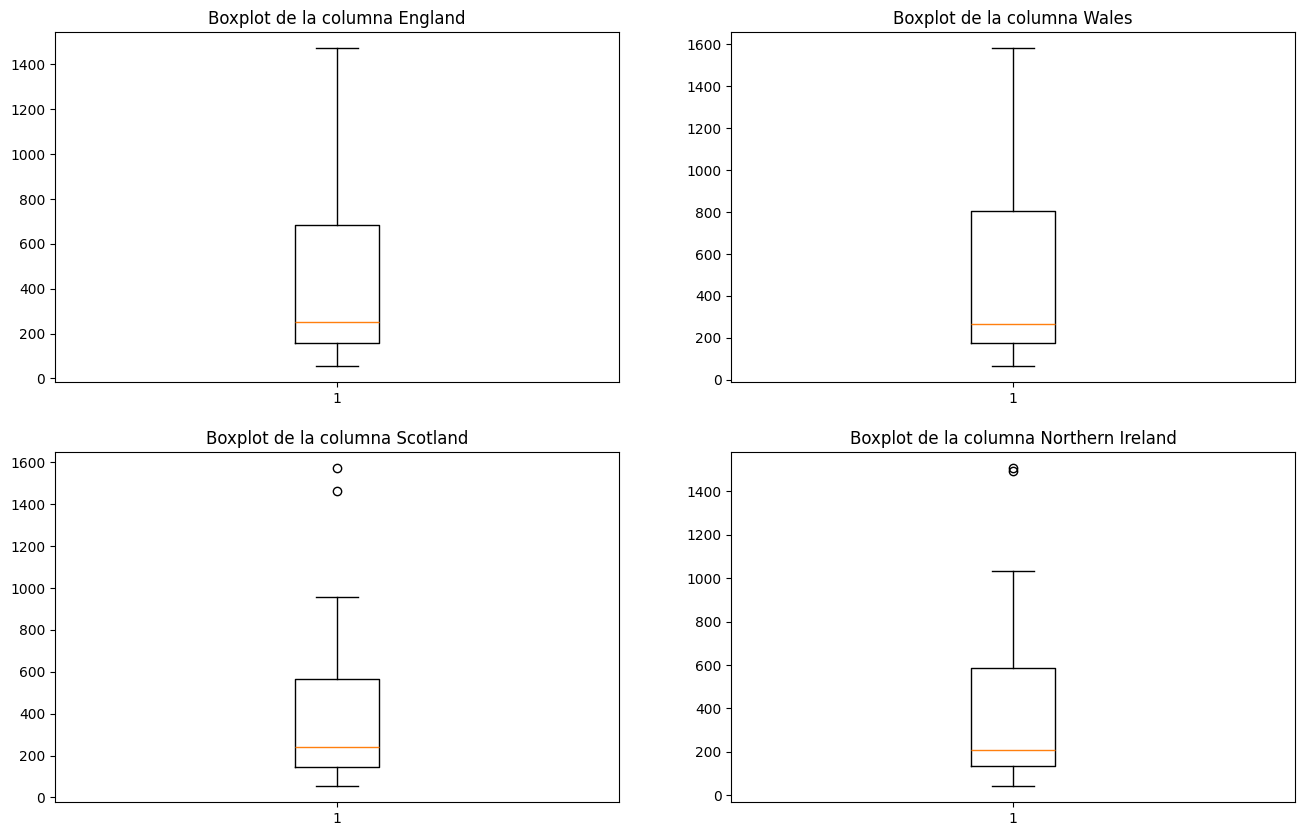

In [88]:
# caja de bigotes
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.boxplot(data['England'])
plt.title('Boxplot de la columna England')

plt.subplot(2, 2, 2)
plt.boxplot(data['Wales'])
plt.title('Boxplot de la columna Wales')

plt.subplot(2, 2, 3)
plt.boxplot(data['Scotland'])
plt.title('Boxplot de la columna Scotland')

plt.subplot(2, 2, 4)
plt.boxplot(data['N.Ireland'])
plt.title('Boxplot de la columna Northern Ireland')

plt.show()

### 1.3 Normalización de los datos

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [90]:
print(data_scaled)

[[-0.83028135 -0.89096138 -0.78414166 -0.78171514]
 [-0.51150903 -0.6154117  -0.47903269 -0.34998399]
 [ 0.49034683  0.66456098  0.63604179  0.33520127]
 [-0.73464965 -0.76429741 -0.74243611 -0.7237214 ]
 [-0.62991018 -0.5976343  -0.60634435 -0.47456313]
 [-0.71415715 -0.73096479 -0.6875604  -0.62491726]
 [ 0.57003991  0.82233539  0.23215655  1.2953198 ]
 [-0.49329347 -0.53096906 -0.63487972 -0.61632559]
 [ 0.04178864  0.14679425 -0.09270767 -0.16096736]
 [-0.61852545 -0.6687439  -0.52732332 -0.52181728]
 [-0.24966034 -0.30875158 -0.27050498 -0.2060736 ]
 [ 1.43983296  1.40676736  1.09041269  0.52421789]
 [ 2.28230266  2.39563515  2.19890209  2.28550915]
 [-0.93957472 -0.95762662 -0.89389308 -0.82252554]
 [ 2.05916204  1.67120616  2.44035523  2.31128414]
 [-0.21550616 -0.06431235 -0.00490653 -0.63350892]
 [-0.94640555 -0.97762619 -0.87413783 -0.83541304]]


## Parte 2: Construcción del Autocodificador 

### 2.1 Uso de todas las observaciones
Como se nos pide que usemos todas las observaciones, no separamos en entrenamiento y prueba.

In [91]:
from tensorflow.keras import layers, models

### 2.2 Arquitectura del autocodificador. 

In [92]:
input_dim = data_scaled.shape[1]

input_layer = layers.Input(shape=(input_dim,))

# Codificador: Reducción progresiva de dimensiones
encoded = layers.Dense(8, activation='relu')(input_layer)
encoded = layers.Dense(4, activation='relu')(encoded)
bottleneck = layers.Dense(2, activation='relu')(encoded)  # Capa de cuello de botella (2 dimensiones)

# Decodificador: Reconstrucción de la entrada
decoded = layers.Dense(4, activation='relu')(bottleneck)
decoded = layers.Dense(8, activation='relu')(decoded)
output_layer = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = models.Model(input_layer, output_layer)

In [93]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [94]:
history = autoencoder.fit(data_scaled, data_scaled, epochs=250, batch_size=16)

Epoch 1/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2655  
Epoch 2/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2517
Epoch 3/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2602 
Epoch 4/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2629
Epoch 5/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2458
Epoch 6/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2409
Epoch 7/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2361
Epoch 8/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2200 
Epoch 9/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2152 
Epoch 10/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2215
Epoch 11/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2286
Epoch 12/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2042
Epoch 13/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2061
Epoch 14/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1851 
Epoch 15/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1795
Epoch 16/250
2/2 ━━━━━━━━━━━

In [95]:
metricas=autoencoder.history.history
metricas

{'loss': [1.2679781913757324,
  1.2607502937316895,
  1.2543482780456543,
  1.2486292123794556,
  1.2434887886047363,
  1.2385838031768799,
  1.2337770462036133,
  1.228919506072998,
  1.2240266799926758,
  1.219090461730957,
  1.2140476703643799,
  1.2088385820388794,
  1.2036826610565186,
  1.198228120803833,
  1.1927250623703003,
  1.1874960660934448,
  1.1820826530456543,
  1.1768664121627808,
  1.1716325283050537,
  1.1664401292800903,
  1.1608482599258423,
  1.1556529998779297,
  1.1499799489974976,
  1.1449660062789917,
  1.1397186517715454,
  1.1348330974578857,
  1.1297422647476196,
  1.1247302293777466,
  1.1197727918624878,
  1.1146992444992065,
  1.1088029146194458,
  1.1034952402114868,
  1.0978267192840576,
  1.0916117429733276,
  1.0858728885650635,
  1.0793029069900513,
  1.0733333826065063,
  1.0674443244934082,
  1.0612791776657104,
  1.0558052062988281,
  1.0505608320236206,
  1.0451411008834839,
  1.0390596389770508,
  1.032103180885315,
  1.0251054763793945,
  1.01

### 2.4 Evaluación del rendimiento del autocodificador

In [96]:
loss = autoencoder.evaluate(data_scaled, data_scaled)
print(f"Pérdida de reconstrucción: {loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.6693
Pérdida de reconstrucción: 0.6692857146263123


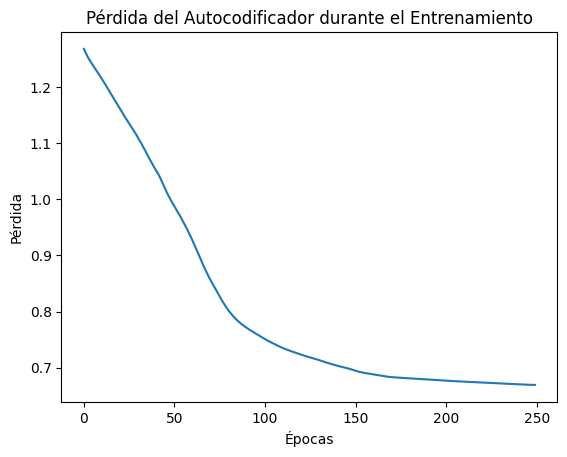

In [97]:
plt.plot(history.history['loss'])
plt.title('Pérdida del Autocodificador durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()


## Parte 3: Reducción de Dimensionalidad y Visualización

### 3.1 Reducción de Dimensionalidad

In [98]:
encoder = models.Model(input_layer, bottleneck)
data_encoded = encoder.predict(data_scaled)

print(data_encoded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[1.8551174e+00 2.1309578e+00]
 [1.3383152e+00 1.6062864e+00]
 [7.1762055e-03 8.3988905e-04]
 [1.7299581e+00 2.0038927e+00]
 [1.4519231e+00 1.7216241e+00]
 [1.6414908e+00 1.9140785e+00]
 [0.0000000e+00 0.0000000e+00]
 [1.4792305e+00 1.7493474e+00]
 [8.3374321e-01 1.0679243e+00]
 [1.5484600e+00 1.8196310e+00]
 [1.0647831e+00 1.3285893e+00]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [1.9213735e+00 2.1982226e+00]
 [0.0000000e+00 0.0000000e+00]
 [1.4847783e+00 1.7549797e+00]
 [1.9521881e+00 2.2295065e+00]]


### 3.2 dimensiones en un gráfico de dispersión

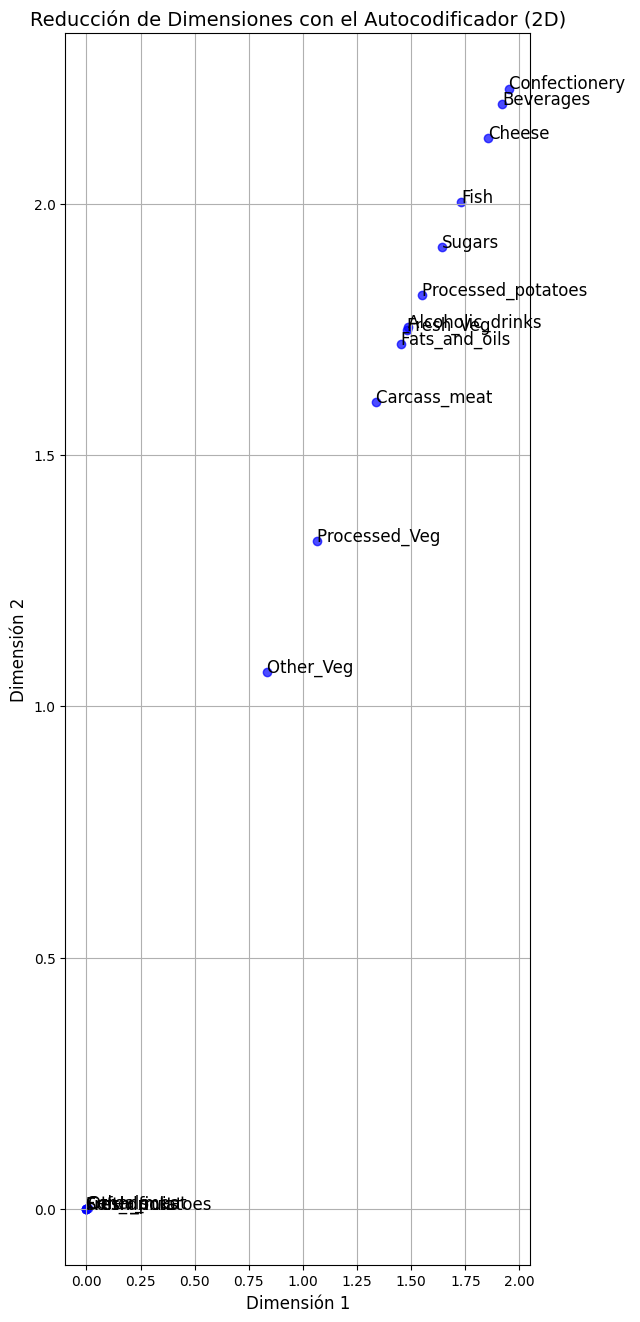

In [99]:
plt.figure(figsize=(6, 16))
plt.scatter(data_encoded[:, 0], data_encoded[:, 1], color='blue', alpha=0.7)

# Añadir etiquetas para identificar los diferentes tipos de alimentos
for i, food in enumerate(data.index):
    plt.text(data_encoded[i, 0], data_encoded[i, 1], food, fontsize=12)

# Personalización del gráfico
plt.title('Reducción de Dimensiones con el Autocodificador (2D)', fontsize=14)
plt.xlabel('Dimensión 1', fontsize=12)
plt.ylabel('Dimensión 2', fontsize=12)
plt.grid(True)
plt.show()

In [102]:
for i, food in enumerate(data.index):
    print(f"{food:20}: {data_encoded[i]}")

Cheese              : [1.8551174 2.1309578]
Carcass_meat        : [1.3383152 1.6062864]
Other_meat          : [0.00717621 0.00083989]
Fish                : [1.729958  2.0038927]
Fats_and_oils       : [1.4519231 1.7216241]
Sugars              : [1.6414908 1.9140785]
Fresh_potatoes      : [0. 0.]
Fresh_Veg           : [1.4792305 1.7493474]
Other_Veg           : [0.8337432 1.0679243]
Processed_potatoes  : [1.54846  1.819631]
Processed_Veg       : [1.0647831 1.3285893]
Fresh_fruit         : [0. 0.]
Cereals             : [0. 0.]
Beverages           : [1.9213735 2.1982226]
Soft_drinks         : [0. 0.]
Alcoholic_drinks    : [1.4847783 1.7549797]
Confectionery       : [1.9521881 2.2295065]


### 3.3 Interpretación de lo que representan estas dos nuevas dimensiones en relación con el consumo de alimentos.

Las Patatas Frescas, Frutas Frescas, Cereales, Bebidas Gaseosas están en [0,0], lo que muestra que no hay variabilidad significativa y su consumo es uniforme. Por otro lado, el Queso, Carne de Despojo, Pescado, Azúcares, Grasas y Aceites, Verduras Frescas, Patatas Procesadas, Bebidas Alcohólicas, Confitería muestran valores más altos en ambas dimensiones, lo que indica que su consumo es más variado y esto puedue depender de la cultura de cada país. 

La dimensión 1 muestra la variabilidad en cuanto al consumo o popularidad de los alimentos, mientras que la dimensión 2 muestra la preferencia regional del alimento.


## Parte 4: Discusión y percepciones nuevas "Insights" (10 puntos)

### 4.1 ¿Qué podemos aprender sobre los patrones de consumo de alimentos en los cuatro países del Reino Unido?
Entre los patrones que podemos observar es la uniformidad de alimentos como las patatas, frutas cereales y gaseosas, también los alimentos que no son tan uniformes como el queso, las bebidas alcohólicas y la confitería  reflejan un patrón de distintas preferencias y culturas en los países. La variabilidad en el consumo de alimentos como la carne de despojo, pescado, azúcares, grasas y aceites pueden depender de la alimentación de cada país y la disponibilidad de los alimentos ya que puede ser más costoso o más barato en algunos países o por la producción de los mismos.



### 4.2 ¿El autocodificador hizo un buen trabajo al reducir la dimensionalidad? ¿Qué métricas de rendimiento apoyan su afirmación?

El decodificador muestra una tendencia de mejora de la périda durante su entrenamiento, llegando a estabilizarse en un valor cercano a 0.7. Se intentó aumentar la cantidad de épocas de entrenamiento, hasta 750, y aunque la périda lograba reducirse hasta un valor de 0.6, la dimensionalidad de los datos se perdía por completo. La primera dimensión se mantenía constante en 0, mientras que la segunda dimensión tenía valores dispersos. Esto indica que el modelo no logra reducir la dimensionalidad de los datos de manera efectiva con más de 500 épocas de entrenamiento.

Con las 350 épocas de entrenamiento, el modelo logra reducir la dimensionalidad de los datos de manera efectiva, manteniendo la variabilidad de los datos en las dos dimensiones. Se pueden observar tendencias claras en los datos, como la uniformidad de los alimentos en la dimensión 1 y la variabilidad en la dimensión 2.

Consideramos que la métrica de rendimiento de MSE es adecuada para evaluar el rendimiento del autocodificador, ya que nos permite comparar la similitud entre los datos originales y los datos reconstruidos. En este caso, el MSE se mantiene en un valor cercano a 0.7, lo que indica que el modelo logra reconstruir los datos de manera efectiva.